In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('D:Marketing.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("D:Marketing.csv")

In [4]:
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             308 non-null    int64  
 1   c_date         308 non-null    object 
 2   campaign_name  308 non-null    object 
 3   category       308 non-null    object 
 4   campaign_id    308 non-null    int64  
 5   impressions    308 non-null    int64  
 6   mark_spent     308 non-null    float64
 7   clicks         308 non-null    int64  
 8   leads          308 non-null    int64  
 9   orders         308 non-null    int64  
 10  revenue        308 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 26.6+ KB


In [6]:
df.isnull().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [7]:
df.duplicated().sum()

0

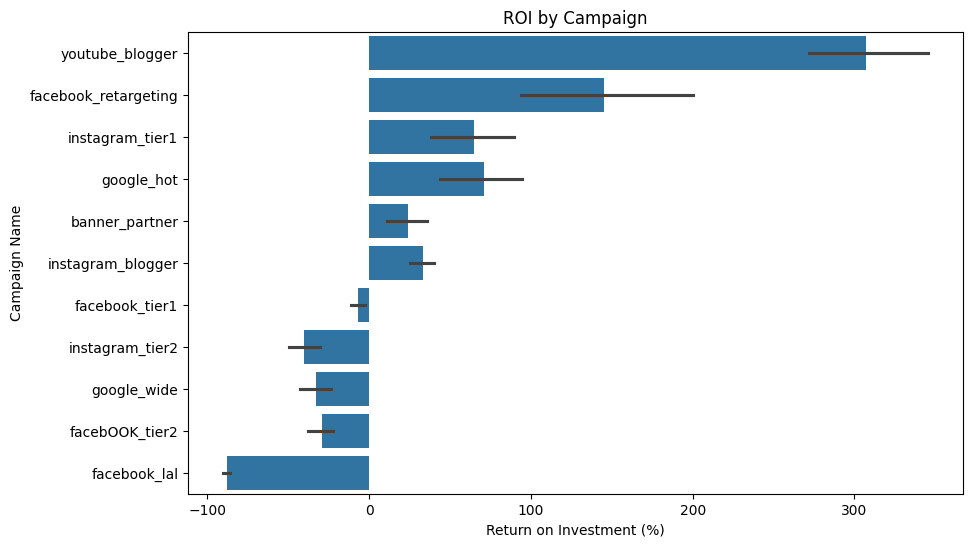

In [8]:
# Calculate ROI
df['ROI'] = ((df['revenue'] - df['mark_spent']) / df['mark_spent']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='ROI', y='campaign_name', data=df.sort_values('ROI', ascending=False))
plt.title('ROI by Campaign')
plt.xlabel('Return on Investment (%)')
plt.ylabel('Campaign Name')
plt.show()

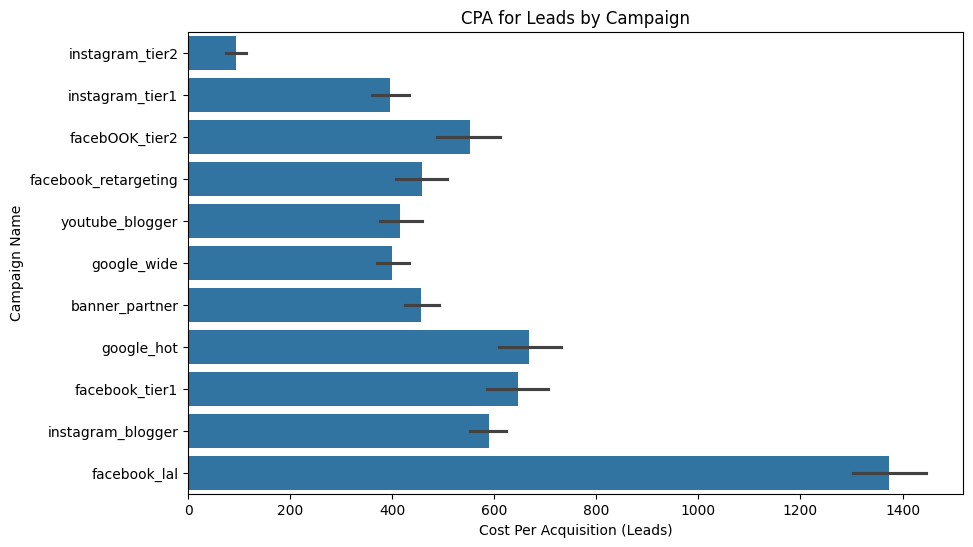

In [9]:
# Calculate CPA_leads
df['CPA_leads'] = df['mark_spent'] / df['leads']

plt.figure(figsize=(10, 6))
sns.barplot(x='CPA_leads', y='campaign_name', data=df.sort_values('CPA_leads'))
plt.title('CPA for Leads by Campaign')
plt.xlabel('Cost Per Acquisition (Leads)')
plt.ylabel('Campaign Name')
plt.show()

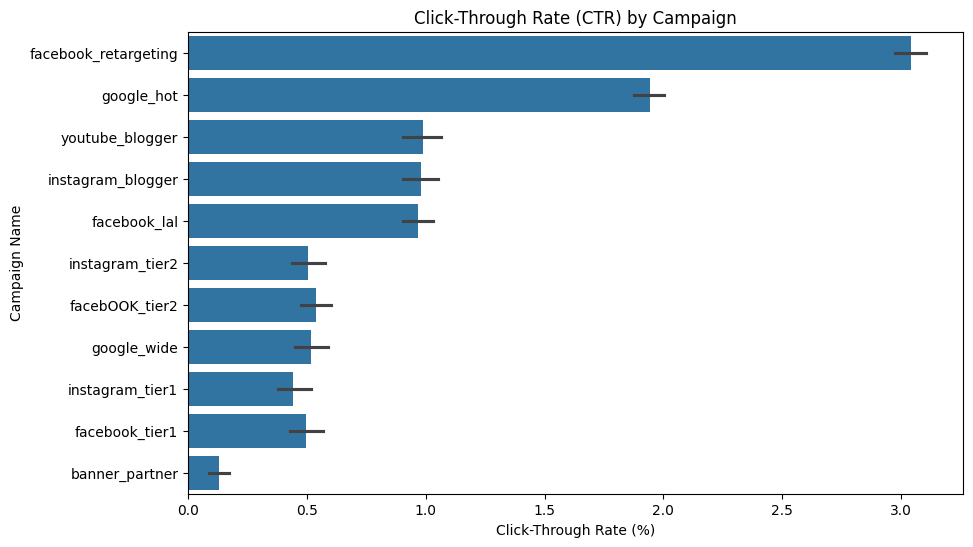

In [10]:
# Calculate CTR
df['CTR'] = (df['clicks'] / df['impressions']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='CTR', y='campaign_name', data=df.sort_values('CTR', ascending=False))
plt.title('Click-Through Rate (CTR) by Campaign')
plt.xlabel('Click-Through Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

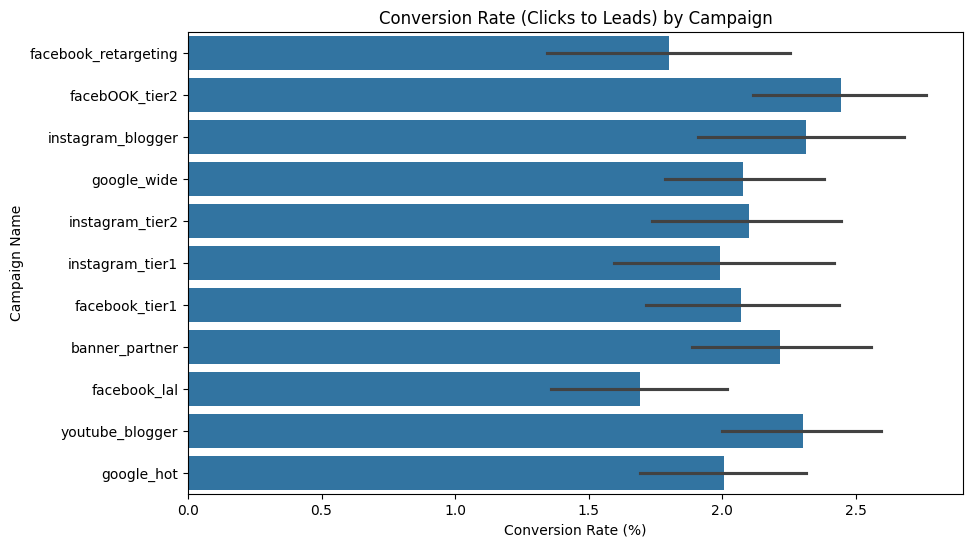

In [11]:
# Calculate Conversion Rate from Clicks to Leads
df['Conversion_Rate_Clicks_Leads'] = (df['leads'] / df['clicks']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Conversion_Rate_Clicks_Leads', y='campaign_name', data=df.sort_values('Conversion_Rate_Clicks_Leads', ascending=False))
plt.title('Conversion Rate (Clicks to Leads) by Campaign')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Campaign Name')
plt.show()

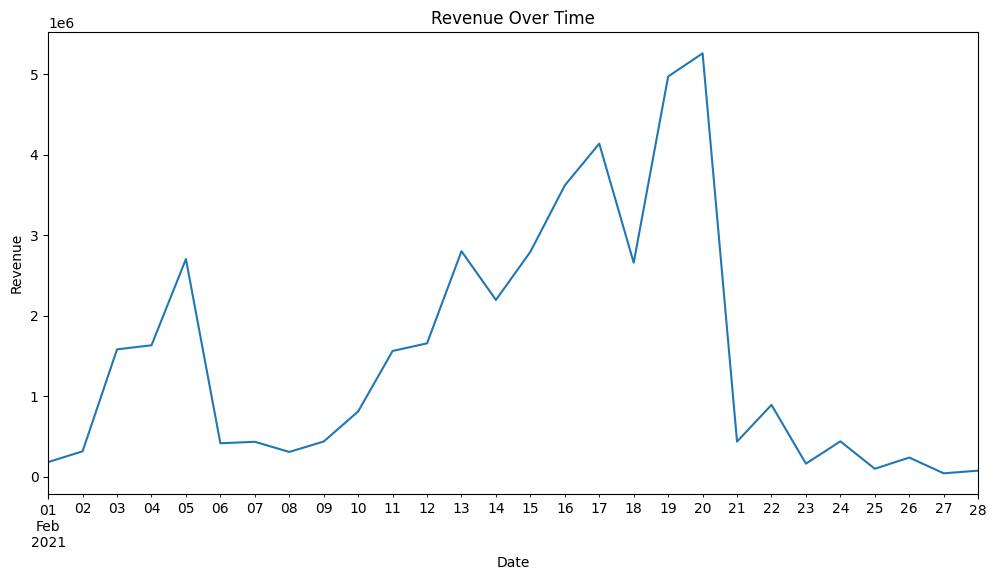

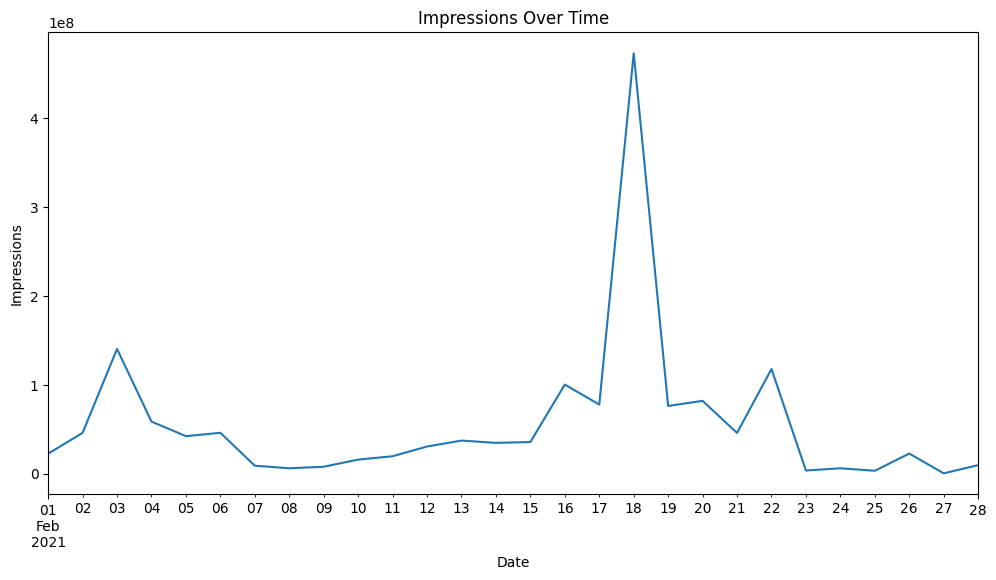

In [12]:
df['c_date'] = pd.to_datetime(df['c_date'])

plt.figure(figsize=(12, 6))
df.groupby('c_date')['revenue'].sum().plot()
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('c_date')['impressions'].sum().plot()
plt.title('Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Impressions')
plt.show()

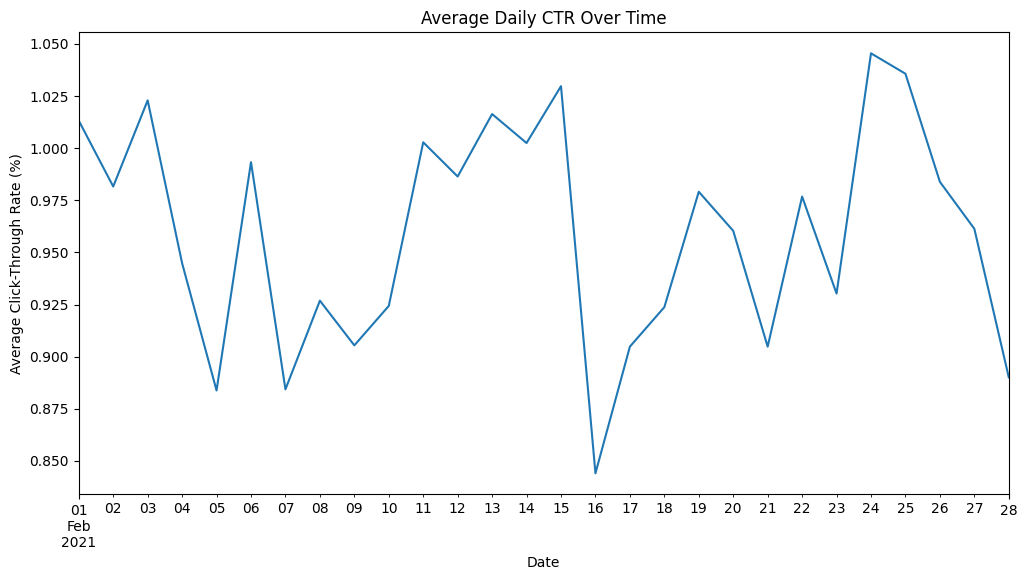

In [13]:
df['CTR'] = (df['clicks'] / df['impressions']) * 100
daily_ctr = df.groupby('c_date')['CTR'].mean()

plt.figure(figsize=(12, 6))
daily_ctr.plot()
plt.title('Average Daily CTR Over Time')
plt.xlabel('Date')
plt.ylabel('Average Click-Through Rate (%)')
plt.show()

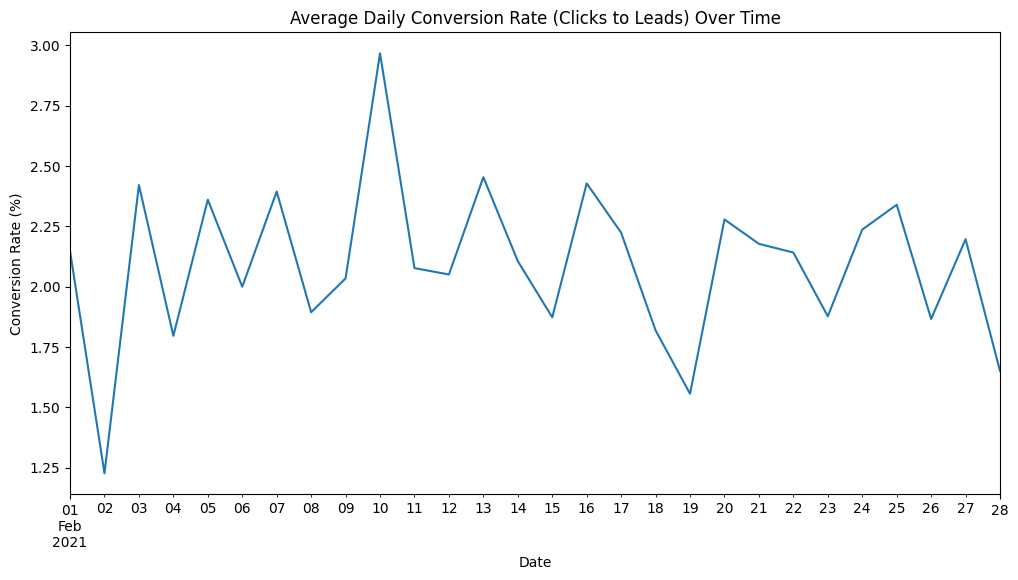

In [14]:
df['Conversion_Rate_Clicks_Leads'] = (df['leads'] / df['clicks']) * 100
daily_conversion_rate = df.groupby('c_date')['Conversion_Rate_Clicks_Leads'].mean()

plt.figure(figsize=(12, 6))
daily_conversion_rate.plot()
plt.title('Average Daily Conversion Rate (Clicks to Leads) Over Time')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.show()

In [15]:
# Cost Per Click (CPC)
df['CPC'] = df['mark_spent'] / df['clicks']
# Cost Per Thousand Impressions (CPM)
df['CPM'] = (df['mark_spent'] / df['impressions']) * 1000
# Average Order Value (AOV)
df['AOV'] = df['revenue'] / df['orders']
# Revenue Per Click (RPC)
df['RPC'] = df['revenue'] / df['clicks']

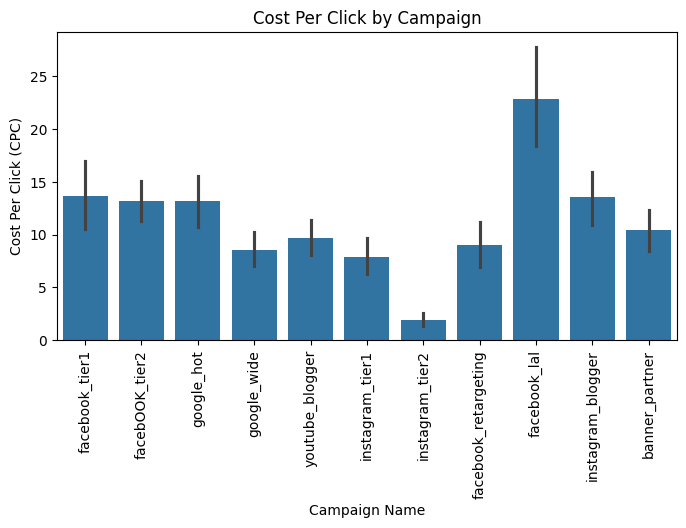

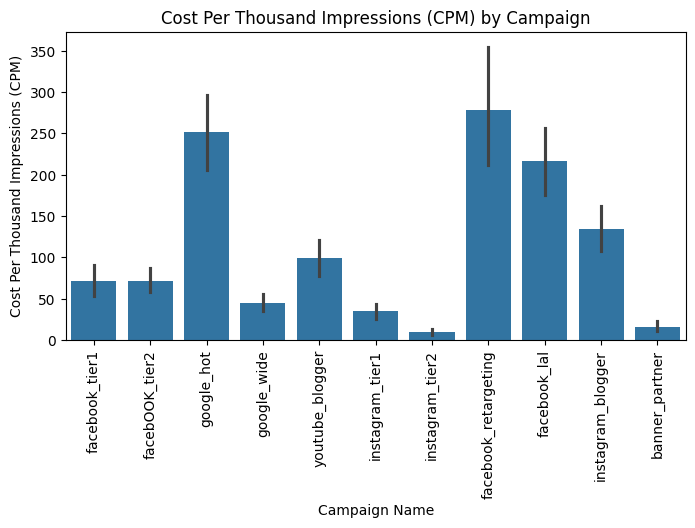

In [16]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='CPC', data=df)
plt.xticks(rotation=90)
plt.title('Cost Per Click by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Cost Per Click (CPC)')
plt.show()

plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='CPM', data=df)
plt.xticks(rotation=90)
plt.title('Cost Per Thousand Impressions (CPM) by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Cost Per Thousand Impressions (CPM)')
plt.show()

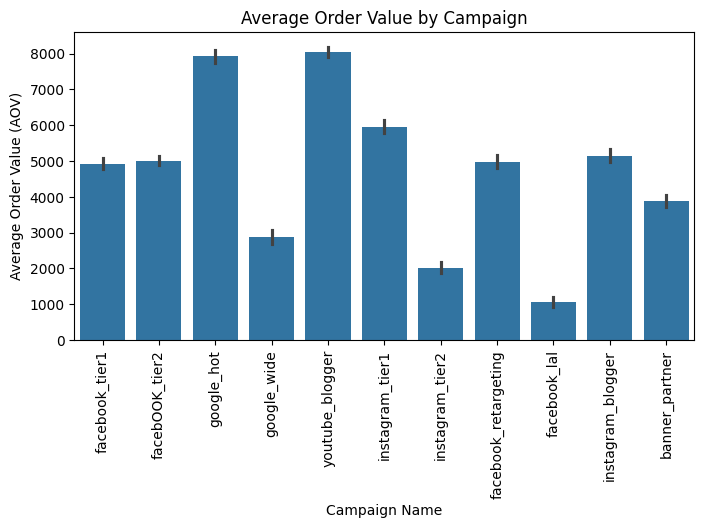

In [17]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='AOV', data=df)
plt.xticks(rotation=90)
plt.title('Average Order Value by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Average Order Value (AOV)')
plt.show()

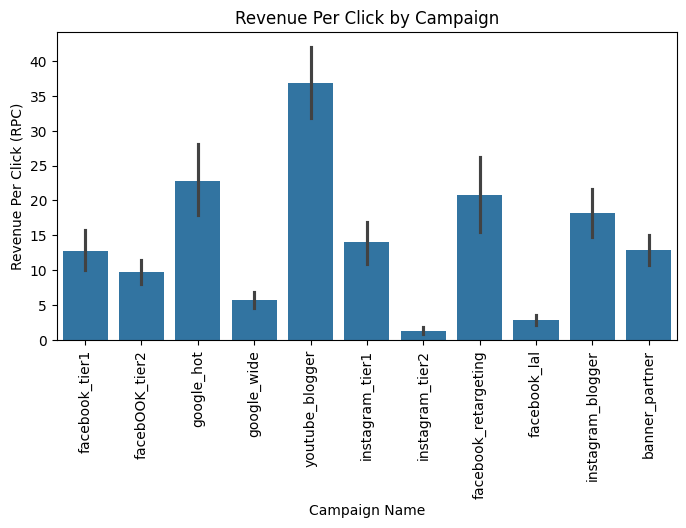

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(x='campaign_name', y='RPC', data=df)
plt.xticks(rotation=90)
plt.title('Revenue Per Click by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Revenue Per Click (RPC)')
plt.show()